In [1]:
from mnist_load import *
from kernel import *
from kpca import KernelPCA

In [32]:
import matplotlib.pyplot as plt

In [97]:
data, indices = load_mnist_data(7, 1, 0.5, 0.06596306068)

In [166]:
def kpca_kernel(Xt, Yt, kernel=lambda x,y: np.dot(x,y)):
    Xt,Yt = data.training
    Xm = (Xt - np.tile(np.mean(Xt, axis=0), (Xt.shape[0], 1)))/255.0
    kpca = KernelPCA()
    kpca.kernel = kernel
    kpca.add_observations(Xm)
    kpca.train()
    U = kpca.U
    L = np.real(kpca.L)
    Ld = np.tile(L**(-0.5), (len(L), 1))
    beta = Ld * U
    return np.real(beta)

In [184]:
def ax_plot_components(beta):
    fig, ax = plt.subplots(figsize=(10,10),ncols= 2, nrows=2)
    idx = 0
    for j in range(0,2):
        for i in range(0,2):
            pts = beta[:, idx:(idx+2)]
            ax[j][i].scatter(*pts.T, s=10)
            ax[j][i].set_xlim((np.min(pts[:, 0]), np.max(pts[:, 0])))
            ax[j][i].set_ylim((np.min(pts[:, 1]), np.max(pts[:, 1])))
            ax[j][i].set_xlabel("e-vector {}".format(idx+1))
            ax[j][i].set_ylabel("e-vector {}".format(idx+2))
            idx += 2
    return fig, ax

In [185]:
Xt,Yt = data.training
Xm = (Xt - np.tile(np.mean(Xt, axis=0), (Xt.shape[0], 1)))/255.0
print("Training Data Shape: ", Xt.shape)

Training Data Shape:  (500, 784)


/nix/store/2lkn4wyv16bhrkriranh82nsy6jd8kyv-python3-3.7.5-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


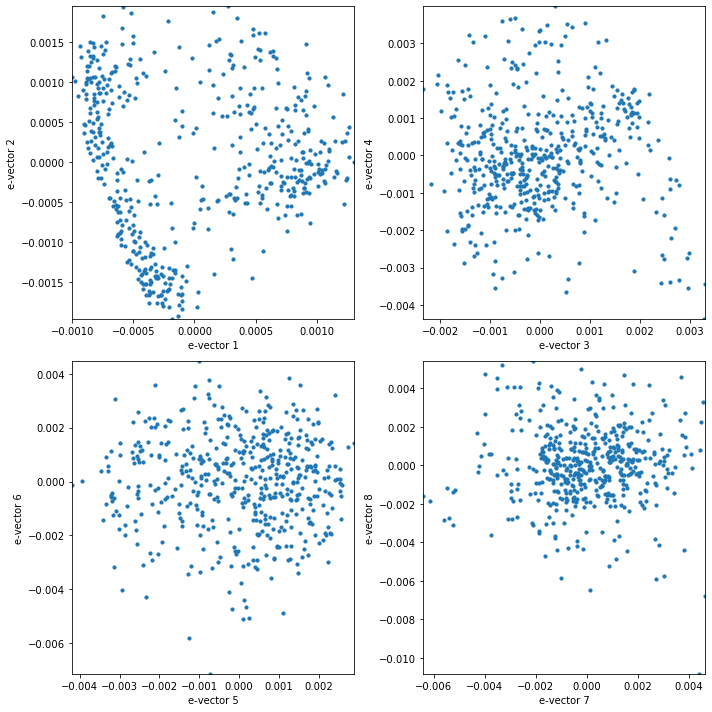

In [192]:
beta = kpca_kernel(Xt, Yt)
fig, ax = ax_plot_components(beta)
plt.tight_layout()
plt.savefig("../img/kpca_polynomial_3.eps")
plt.show()

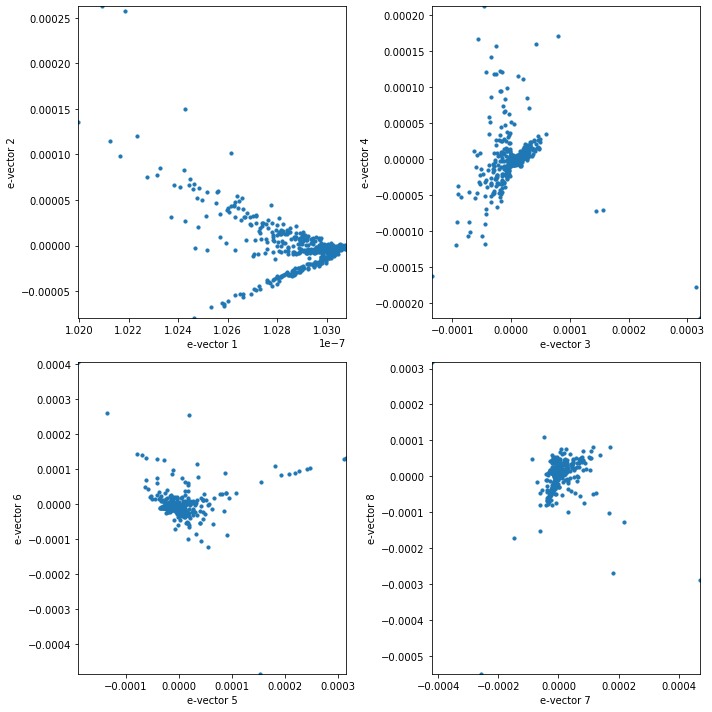

In [190]:
beta1 = kpca_kernel(Xt, Yt, kernel=lambda x,y: k_polynomial(x, y, 3))
fig, ax = ax_plot_components(beta1)
plt.tight_layout()
plt.savefig("../img/kpca_linear.eps")
plt.show()